## Context:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Problem Statement:

Build a model to accurately predict whether the patients in the dataset have diabetes or not?

### Dataset Description:

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
#Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
from sklearn import metrics
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum().any()

False

## Project Task: Week 1
Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [6]:
df[df.Glucose==0]   #AS WE CAN SEE THERE IS 0 VALUE IN GLUCOSE COLUMN WE NEED TO FILL THE SAME 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


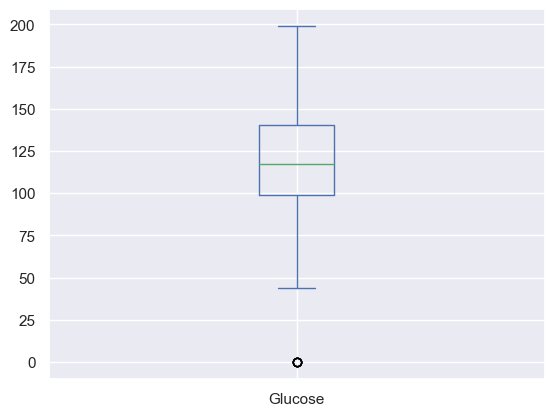

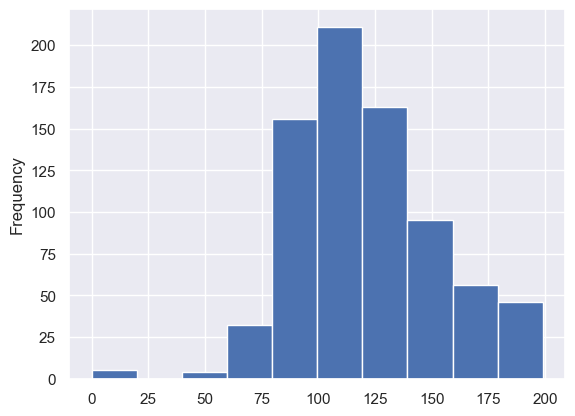

In [7]:
df['Glucose'].plot(kind='box')
plt.show()
df['Glucose'].plot(kind='hist')
plt.show()
# As we can see there is only lower outlier so we can fill the same with mean

In [8]:
#replacing nan values which is present in the form of 0
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())

In [9]:
df[df.BloodPressure==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115.0,0,0,0,35.3,0.134,29,0
15,7,100.0,0,0,0,30.0,0.484,32,1
49,7,105.0,0,0,0,0.0,0.305,24,0
60,2,84.0,0,0,0,0.0,0.304,21,0
78,0,131.0,0,0,0,43.2,0.270,26,1
81,2,74.0,0,0,0,0.0,0.102,22,0
172,2,87.0,0,23,0,28.9,0.773,25,0
193,11,135.0,0,0,0,52.3,0.578,40,1
222,7,119.0,0,0,0,25.2,0.209,37,0
261,3,141.0,0,0,0,30.0,0.761,27,1


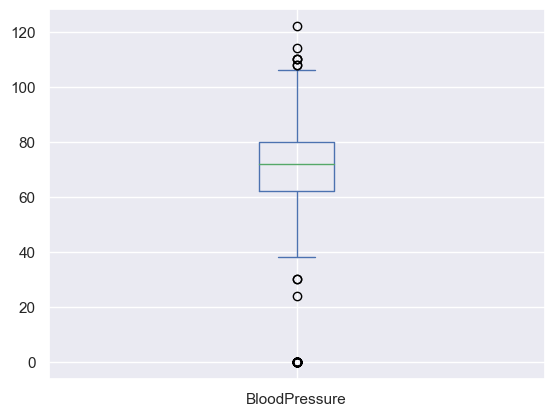

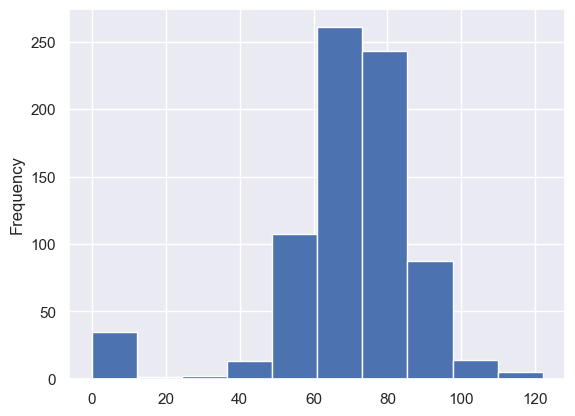

In [10]:
df['BloodPressure'].plot(kind='box')
plt.show()
df['BloodPressure'].plot(kind='hist')
plt.show()
#As we can see the there is a outlier on both the side so we will be prefering median which will be more accurate than mean in this case 

In [11]:
#replacing nan values which is present in the form of 0
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median())

In [12]:
df[df.SkinThickness==0] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183.0,64,0,0,23.3,0.672,32,1
5,5,116.0,74,0,0,25.6,0.201,30,0
7,10,115.0,72,0,0,35.3,0.134,29,0
9,8,125.0,96,0,0,0.0,0.232,54,1
10,4,110.0,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123.0,72,0,0,36.3,0.258,52,1
758,1,106.0,76,0,0,37.5,0.197,26,0
759,6,190.0,92,0,0,35.5,0.278,66,1
762,9,89.0,62,0,0,22.5,0.142,33,0


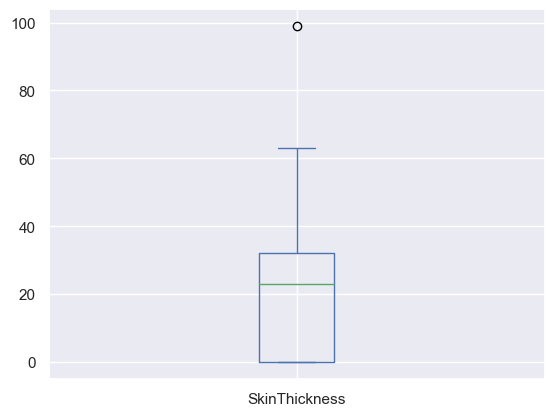

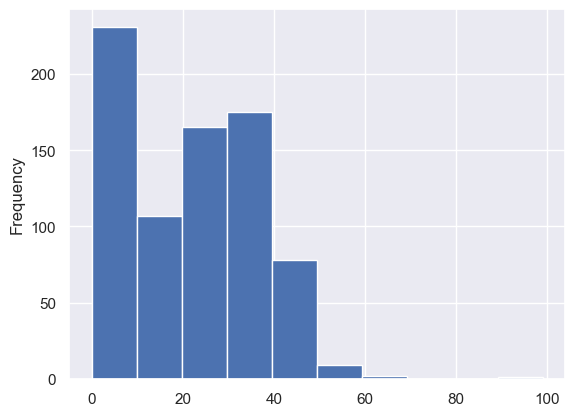

In [13]:
df['SkinThickness'].plot(kind='box')
plt.show()
df['SkinThickness'].plot(kind='hist')
plt.show()

In [14]:
#We will be using median to fill the missing values 
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())

In [15]:
df[df.Insulin==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,23,0,23.3,0.672,32,1
5,5,116.0,74,23,0,25.6,0.201,30,0
7,10,115.0,72,23,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74,31,0,44.0,0.403,43,1
762,9,89.0,62,23,0,22.5,0.142,33,0
764,2,122.0,70,27,0,36.8,0.340,27,0
766,1,126.0,60,23,0,30.1,0.349,47,1


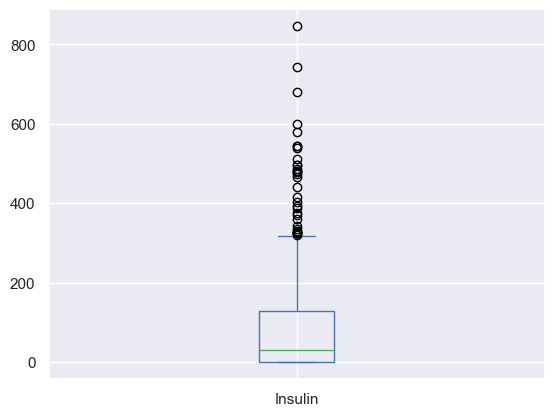

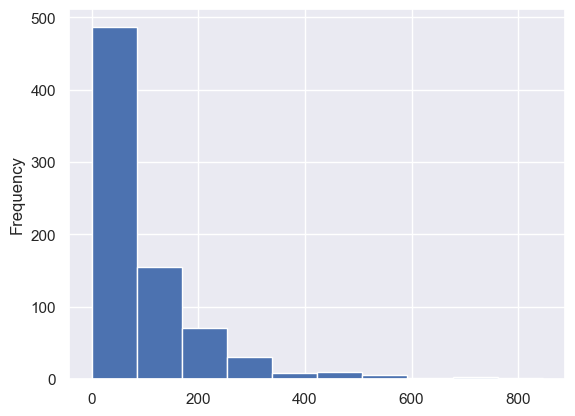

In [16]:
df['Insulin'].plot(kind='box')
plt.show()
df['Insulin'].plot(kind='hist')
plt.show()

In [17]:
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())

In [18]:
df[df.BMI==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125.0,96,23,30.5,0.0,0.232,54,1
49,7,105.0,72,23,30.5,0.0,0.305,24,0
60,2,84.0,72,23,30.5,0.0,0.304,21,0
81,2,74.0,72,23,30.5,0.0,0.102,22,0
145,0,102.0,75,23,30.5,0.0,0.572,21,0
371,0,118.0,64,23,89.0,0.0,1.731,21,0
426,0,94.0,72,23,30.5,0.0,0.256,25,0
494,3,80.0,72,23,30.5,0.0,0.174,22,0
522,6,114.0,72,23,30.5,0.0,0.189,26,0
684,5,136.0,82,23,30.5,0.0,0.640,69,0


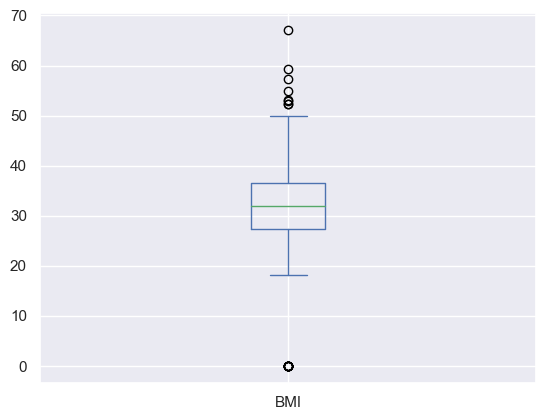

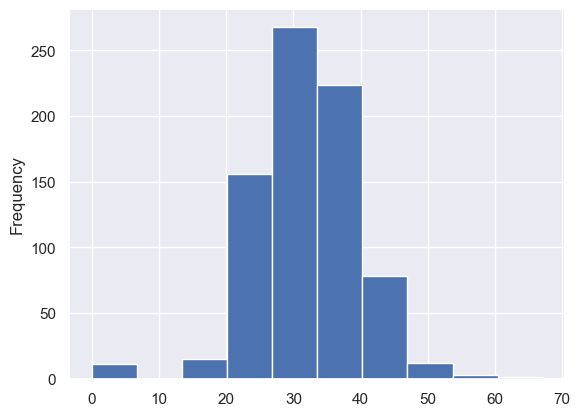

In [19]:
df['BMI'].plot(kind='box')
plt.show()
df['BMI'].plot(kind='hist')
plt.show()

In [20]:
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [21]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

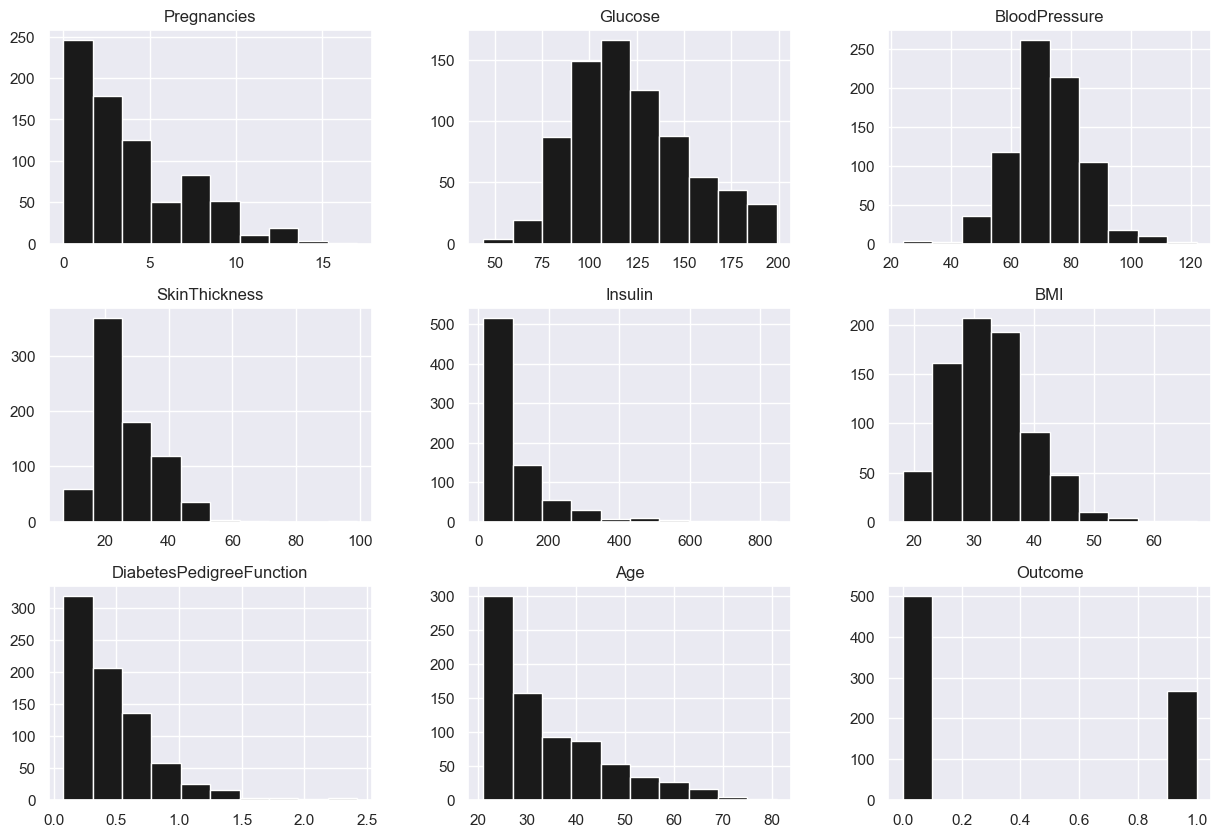

In [22]:
df.hist(figsize=(15,10),color='k')
plt.show()

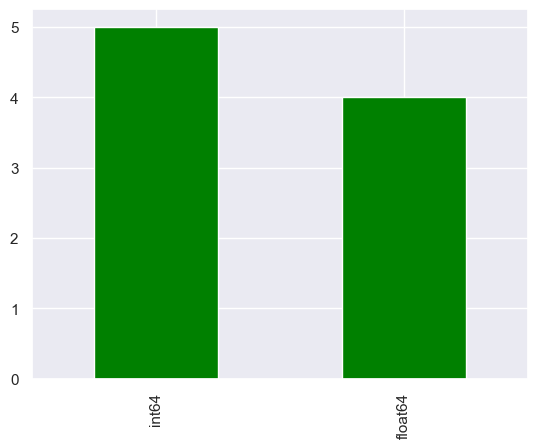

In [23]:
df.dtypes.value_counts().plot(kind='bar',color='green')
plt.show()

## Project Task: Week 2
Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

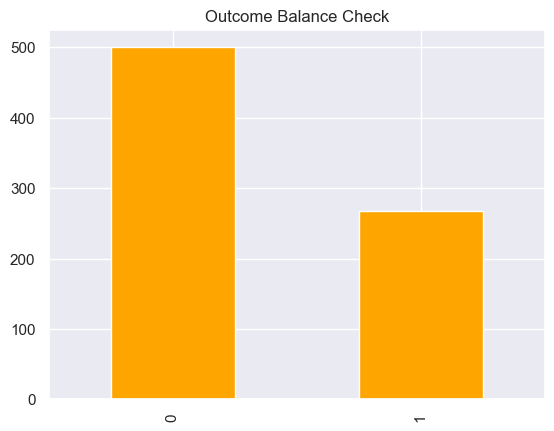

In [24]:
df['Outcome'].value_counts().plot(kind='bar',color='orange')
plt.title('Outcome Balance Check')
plt.show()
#We can see there is a poor balance in our dataset

In [25]:
! pip install imbalanced-learn

In [26]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome'])


In [27]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='outcome'>

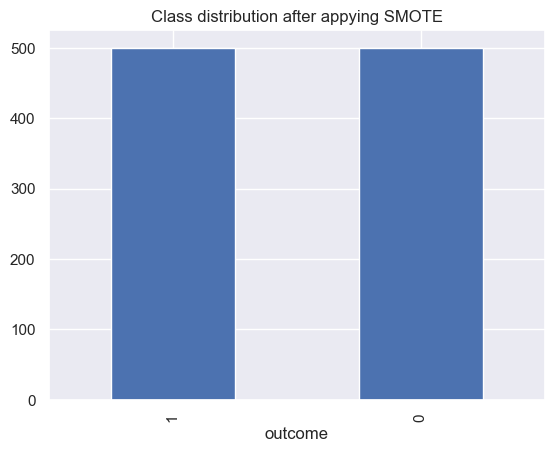

In [28]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='outcome')

In [29]:
pd.Series(y_resampled).value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [30]:
X_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.000000,72,35,30.500000,33.600000,0.627000,50
1,1,85.000000,66,29,30.500000,26.600000,0.351000,31
2,8,183.000000,64,23,30.500000,23.300000,0.672000,32
3,1,89.000000,66,23,94.000000,28.100000,0.167000,21
4,0,137.000000,40,35,168.000000,43.100000,2.288000,33
...,...,...,...,...,...,...,...,...
995,7,183.911574,84,32,30.500000,35.564846,0.354646,41
996,1,125.990456,49,41,175.914102,35.677094,0.846777,26
997,5,96.586846,80,25,181.269477,35.507791,0.289809,43
998,7,107.930378,70,23,30.500000,30.437341,0.906195,32


In [31]:
y_resampled

0      1
1      0
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Outcome, Length: 1000, dtype: int64

In [32]:
X_resampled.isnull().sum().any()

False

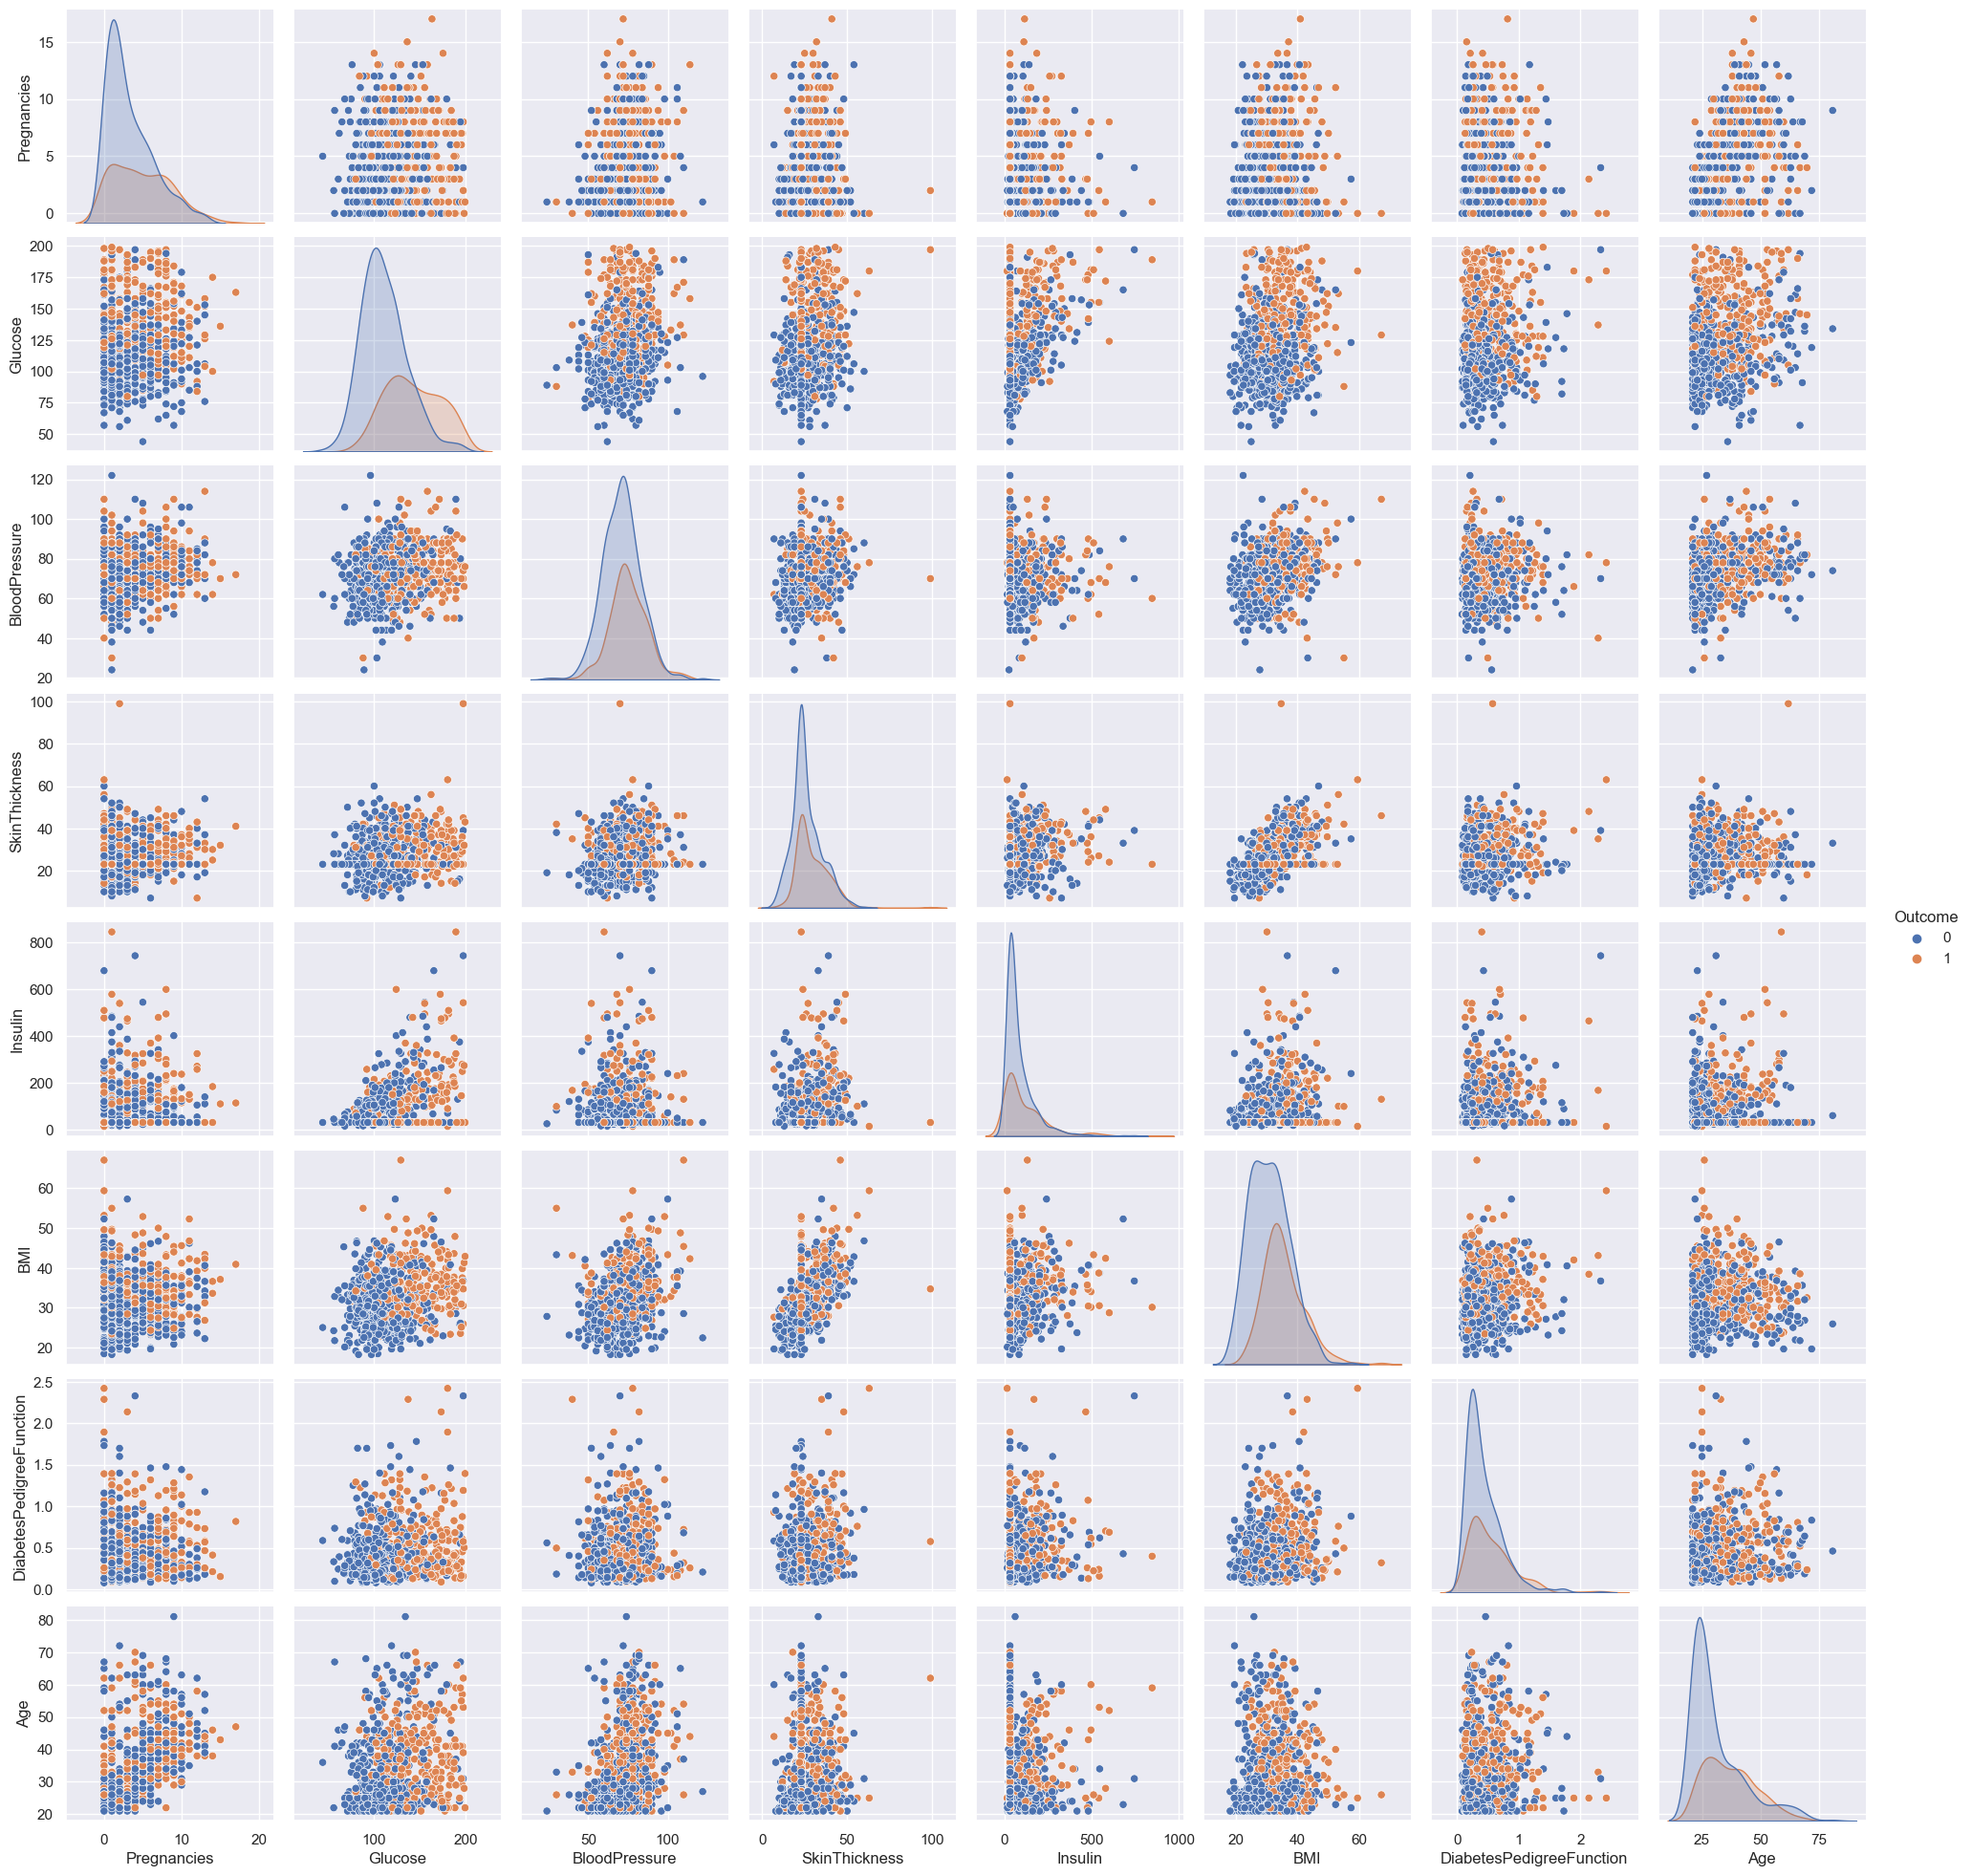

In [33]:
#Visualizing Pairplot
sns.pairplot(df,hue='Outcome')
plt.show()

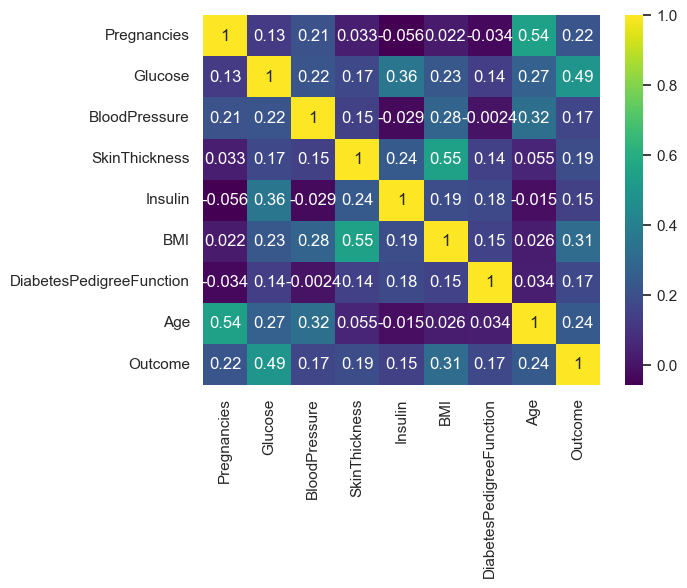

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

## Project Task: Week 3
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

## Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X_resampled)

Accuracy Score of the model 84.0
RF train roc-auc: 0.9769338959212377
RF test roc-auc: 0.8965413533834585
AUC: 0.897


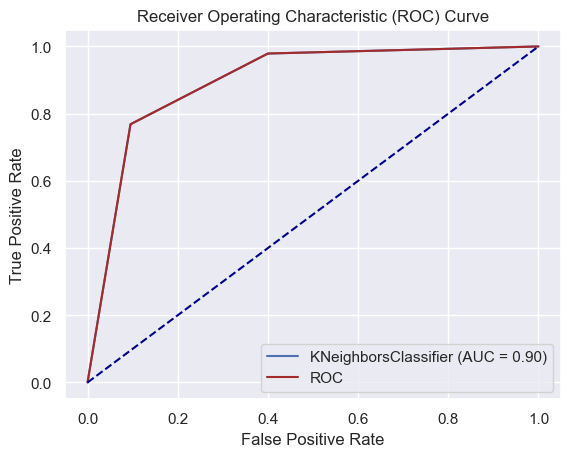

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.88      0.77      0.82        95

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



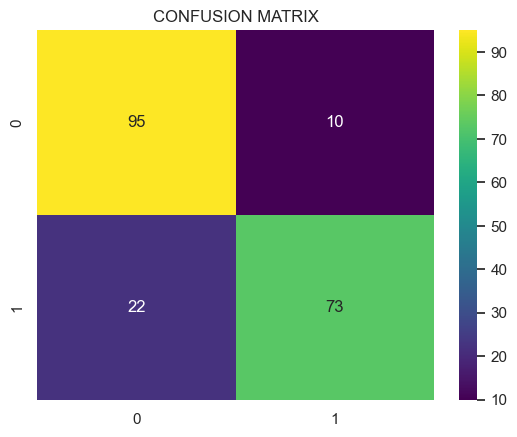

In [36]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_resampled,test_size=0.2,random_state=0)
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train,y_train)
predict=neigh.predict(x_test)
print('Accuracy Score of the model',accuracy_score(y_test,predict)*100)

# Roc curve score
y_train_knn=neigh.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, y_train_knn[:,1])))
y_test_knn=neigh.predict_proba(x_test)
y_test_prob=y_test_knn[:,1]
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, y_test_knn[:,1])))
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
metrics.plot_roc_curve(neigh, x_test, y_test) 


#Calculating AUC score 
auc = roc_auc_score(y_test, y_test_knn[:,1])
print('AUC: %.3f' % auc)

#Ploting Roc Curve
plt.plot(fpr, tpr, color='brown', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(classification_report(y_test,predict))
cf_matrix=confusion_matrix(y_test,predict)
sns.heatmap(cf_matrix, annot=True, cmap='viridis')
plt.title('CONFUSION MATRIX')
plt.show()

Accurcay Score: 78.5 %
RF train roc-auc: 0.8247976246288482
RF test roc-auc: 0.8965413533834585
AUC: 0.897


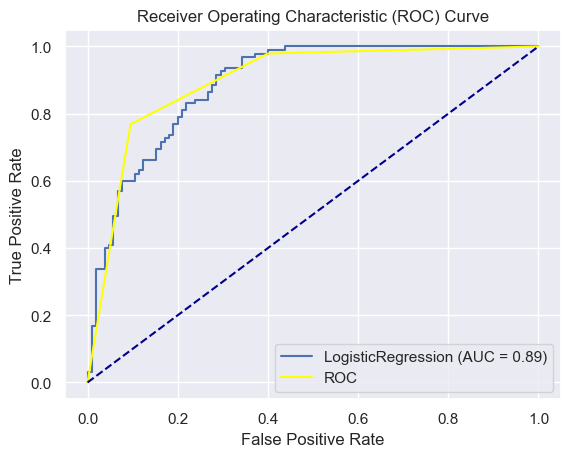

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.78      0.77      0.77        95

    accuracy                           0.79       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.79      0.78       200



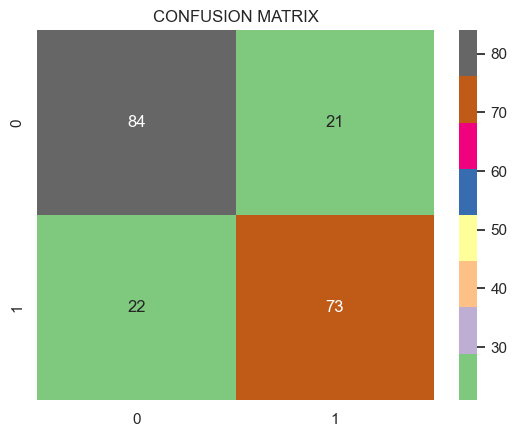

In [37]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression().fit(x_train,y_train)
predict_log=log.predict(x_test)
print('Accurcay Score:',accuracy_score(y_test,predict_log)*100,"%")

# Roc curve score
y_train_log=log.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, y_train_log[:,1])))
y_test_log=neigh.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, y_test_log[:,1])))
fpr, tpr, thresholds = roc_curve(y_test, y_test_log[:,1])
metrics.plot_roc_curve(log, x_test, y_test) 

#Calculating AUC score 
auc = roc_auc_score(y_test, y_test_log[:,1])
print('AUC: %.3f' % auc)

#Ploting Roc Curve
plt.plot(fpr, tpr, color='yellow', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print(classification_report(y_test,predict_log))
cf_matrix=confusion_matrix(y_test,predict_log)
sns.heatmap(cf_matrix, annot=True, cmap='Accent')
plt.title('CONFUSION MATRIX')
plt.show()

Accuracy Score: 77.0 %
RF train roc-auc: 0.7984247538677918
RF test roc-auc: 0.8965413533834585
AUC: 0.897


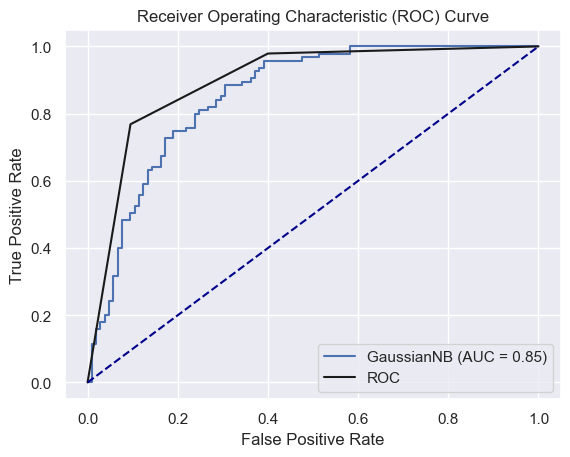

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       105
           1       0.79      0.71      0.74        95

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



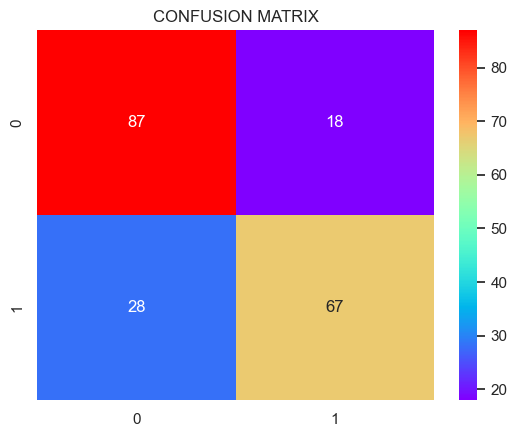

In [38]:
#NaiveBayes's
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB().fit(x_train,y_train)
predict_nb=nb.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,predict_nb)*100,"%")

# Roc curve score
y_train_nb=nb.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, y_train_nb[:,1])))
y_test_nb=neigh.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, y_test_nb[:,1])))
fpr, tpr, thresholds = roc_curve(y_test, y_test_nb[:,1])
metrics.plot_roc_curve(nb, x_test, y_test) 

#Calculating AUC score 
auc = roc_auc_score(y_test, y_test_nb[:,1])
print('AUC: %.3f' % auc)

#Ploting Roc Curve
plt.plot(fpr, tpr, color='k', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


print(classification_report(y_test,predict_nb))
cf_matrix=confusion_matrix(y_test,predict_nb)
sns.heatmap(cf_matrix, annot=True, cmap='rainbow')
plt.title('CONFUSION MATRIX')
plt.show()

Accuracy Score: 87.5 %
RF train roc-auc: 0.9999999999999999
RF test roc-auc: 0.8965413533834585
AUC: 0.897


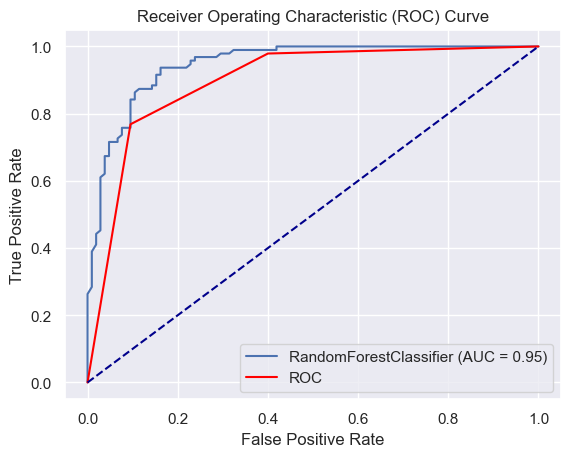

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       105
           1       0.82      0.94      0.88        95

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



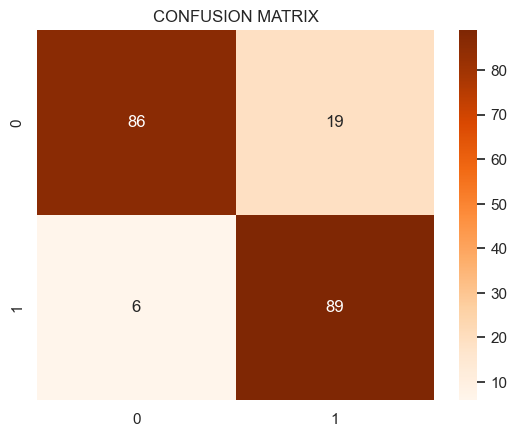

In [39]:
#Random Forest ensemble Learning
from sklearn.ensemble import RandomForestClassifier
Rfc=RandomForestClassifier(n_estimators=200,criterion='entropy').fit(x_train,y_train)
predict_rfc=Rfc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,predict_rfc)*100,"%")

# Roc curve score
y_train_rfc=Rfc.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, y_train_rfc[:,1])))
y_test_rfc=neigh.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, y_test_rfc[:,1])))
fpr, tpr, thresholds = roc_curve(y_test, y_test_rfc[:,1])
metrics.plot_roc_curve(Rfc, x_test, y_test) 

#Calculating AUC score 
auc = roc_auc_score(y_test, y_test_rfc[:,1])
print('AUC: %.3f' % auc)

#Ploting Roc Curve
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(classification_report(y_test,predict_rfc))
cf_matrix=confusion_matrix(y_test,predict_rfc)
sns.heatmap(cf_matrix, annot=True, cmap='Oranges')
plt.title('CONFUSION MATRIX')
plt.show()

Accuracy Score: 85.0 %
RF train roc-auc: 0.9496796374433505
RF test roc-auc: 0.9141854636591478
AUC: 0.914


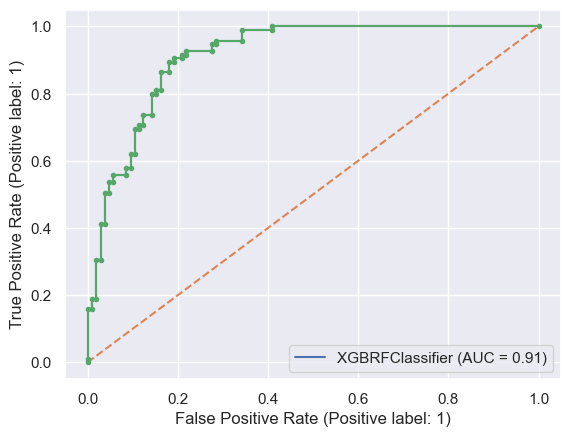

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       105
           1       0.82      0.94      0.88        95

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



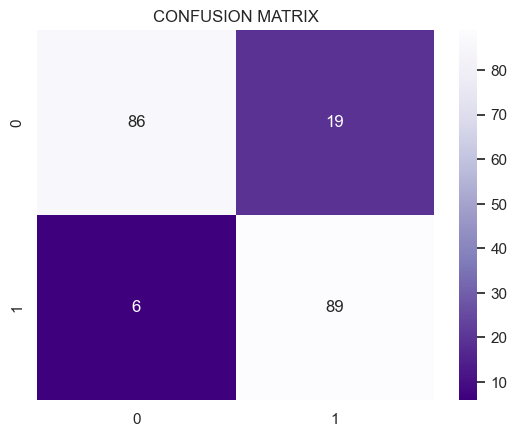

In [40]:
#xgboost
from xgboost import XGBRFClassifier
Xg=XGBRFClassifier(learning_rate=0.8).fit(x_train,y_train)
predict_xg=Xg.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,predict_xg)*100,'%')


# Roc curve score
y_train_xg=Xg.predict_proba(x_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, y_train_xg[:,1])))
y_test_xg=Xg.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, y_test_xg[:,1])))
fpr, tpr, thresholds = roc_curve(y_test, y_test_xg[:,1])
metrics.plot_roc_curve(Xg, x_test, y_test) 

#Calculating AUC score 
auc = roc_auc_score(y_test, y_test_xg[:,1])
print('AUC: %.3f' % auc)

#C Calculating ROC curve 
fpr,tpr,thresh=roc_curve(y_test,y_test_xg[:,1])
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()


print(classification_report(y_test,predict_rfc))
cf_matrix=confusion_matrix(y_test,predict_rfc)
sns.heatmap(cf_matrix, annot=True, cmap='Purples_r')
plt.title('CONFUSION MATRIX')
plt.show()

## As I can conclude that Random Forest and XGboost are more efficient models than other classification models 

## Select the Right Threshold values using ROC Curve

In [41]:
pred=[]
for model in [neigh,log,nb,Rfc,Xg]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9372431077694235


In [42]:
pd.concat(pred,axis=1)

,0,1,2,3,4
0,1.0,0.865631,0.907299,0.975,0.812338
1,1.0,0.808131,0.592015,0.650,0.514422
2,0.5,0.596054,0.894185,0.605,0.549517
3,0.0,0.128592,0.027714,0.035,0.180487
4,0.0,0.193959,0.344926,0.160,0.216633
...,...,...,...,...,...
195,0.0,0.142197,0.094755,0.110,0.179372
196,0.5,0.551647,0.510263,0.755,0.706638
197,1.0,0.931207,0.996777,0.810,0.691814
198,0.5,0.312881,0.048336,0.305,0.356626


In [43]:
final_prediction #average of all the models

0      0.912054
1      0.712914
2      0.628951
3      0.074359
4      0.183104
         ...   
195    0.105265
196    0.604710
197    0.885959
198    0.304569
199    0.402978
Length: 200, dtype: float64

In [44]:
#### Calculate the ROc Curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.93860939, 0.93860939, 0.90695076, 0.90313979, 0.79022243,
       0.78624457, 0.76352868, 0.75484194, 0.72945292, 0.71644514,
       0.69859872, 0.69737844, 0.68784314, 0.68687871, 0.68470397,
       0.68403811, 0.68288926, 0.67443321, 0.65191634, 0.64743984,
       0.63271943, 0.63183586, 0.61635046, 0.61385052, 0.6047097 ,
       0.59997281, 0.56455757, 0.55796624, 0.54907932, 0.54027833,
       0.53466593, 0.53053464, 0.50857791, 0.4901196 , 0.48806795,
       0.48568428, 0.47368347, 0.45579084, 0.45531238, 0.44943638,
       0.44479248, 0.19962267, 0.19455046, 0.04496758])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
32,0.508578,0.885
31,0.530535,0.880
29,0.540278,0.880
28,0.549079,0.875
35,0.485684,0.875


In [46]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

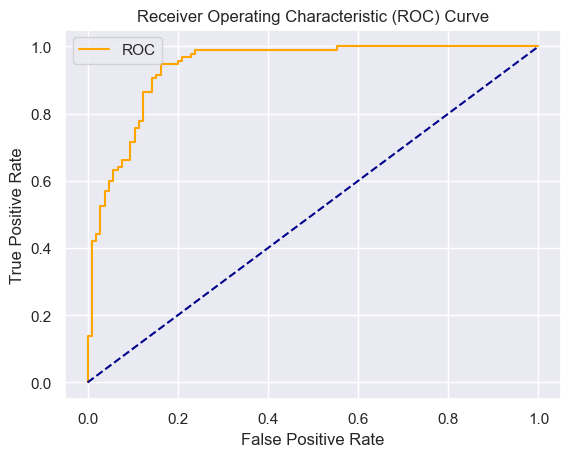

In [47]:
plot_roc_curve(fpr,tpr)

## As we can conclude that the combined and ideal threshold value should be 0.504313 to get highest accuracy of our models .


## 4(2). Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

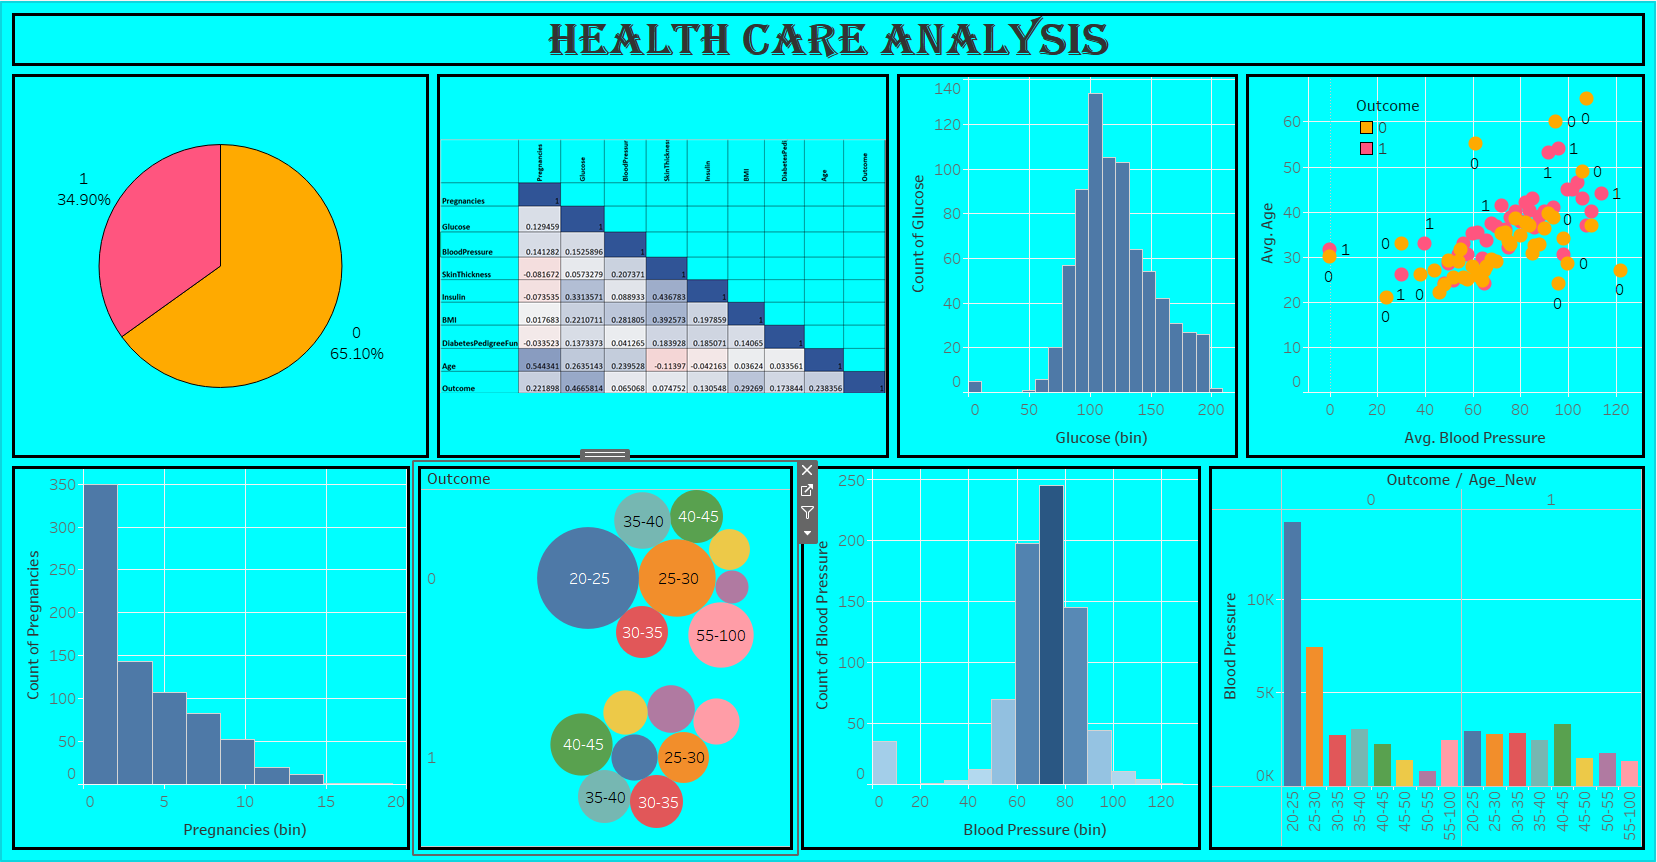

In [48]:
from IPython import display
display.Image("C:\Programming\Data Science Bootcamp project\Project 2\dashboard.PNG")

## By Rutuja Dindore